## Источники

- [`investing.com`](https://ru.investing.com/) - котировки акций и индексов
- [`cbr.ru`](https://www.cbr.ru/) - курсы валют
- [`cbonds.ru`](https://cbonds.ru/) - ставки на разные промежутки, котировки облигаций и даты выплаты купонов
- [`dohod.ru`](https://www.dohod.ru/) - списки облигаций

Собрать данные.
1. ~~Процентные ставки на разные сроки (от 0 до 30 лет) за период с 1 января 2021 г. по 1 января 2025 г.~~
2. ~~Описания 5 государственных облигаций РФ (расписания выплат). Критерии — государственные облигации с полностью известными размерами выплат (не привязанные к показателям), без оферт, со сроком погашения после 1 января 2025 г.:~~
3. ~~Рыночные котировки этих облигаций за период с 1 января 2021 г. по 1 января 2025 г~~.
4. ~~Котировки 10 российских акций за тот же период.~~
5. ~~Значения индекса МосБиржи, индекса РТС, цены на нефть Brent и курса доллара и евро за тот же период.~~
6. Котировки фьючерса и опционов на фьючерс на один выбранный актив из предыдущего пункта — выбрать один торговый день за 2024 год. Срок погашения и фьючерса, и опционов взять ближайшие к выбранному дню, но не ближе, чем 1 месяц. Опционы и Put, и Call — только для бонусного задания.

In [ ]:
path_data = 'data/'

In [31]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import plotly.graph_objects as go

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', None)


In [46]:
def make_ax_better(ax, locators=()):
    """
        Функция добавляет сетку, убирает края и делает minor ticks
    """
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if 'x' in locators:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
    if 'y' in locators:
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    if locators:
        ax.tick_params(which='minor', length=2.5)
        ax.tick_params(which='major', length=5)
        ax.grid(which='minor', linewidth=0.15, color='tab:grey', alpha=0.3)
    ax.grid(linewidth=0.5, color='tab:grey', alpha=0.3)
    ax.set_axisbelow(True)

def make_str_bold(s):
    """
        Функция для выделения строки жирным для print
    """
    return '\033[1m' + str(s) + '\033[0m'

colors = [
    '#42CAFD', '#FF751F', '#8DD65C', '#FF495C',
    '#42CAFD', '#D68FD6', '#FFCB47',
    '#DACC3E', '#CC5A71', '#A44200',
    '#42CAFD', '#FF751F', '#8DD65C', '#FF495C',
    '#42CAFD', '#D68FD6', '#FFCB47',
] * 10


def plot_ts_plotly(
    df: pd.DataFrame,
    x: str,
    y: list[str],
    palette: list[str] = colors,
    title: str = None,
    xaxis_title: str = 'Дата',
    yaxis_title: str = '% от цены покупки',
    fig_size: tuple[int, int] = (1100, 550),  # Размер фигуры (ширина, высота)
):
    # Создаем фигуру
    fig = go.Figure()
        
    # Добавляем линии для каждого столбца в DataFrame
    for col, color in zip(y, palette):
        fig.add_trace(
            go.Scatter(
                x=df[x],
                y=df[col],
                mode='lines',
                name=col,
                line=dict(color=color),
                hovertemplate=f'<b>{col}</b>: %{{y:.1f}}%<extra></extra>'
            )
        )

    # Настраиваем заголовок и оси
    fig.update_layout(
        title={
            'text': title,
            'y': 0.95,  # Позиция заголовка по вертикали
            'x': 0.5,    # Позиция заголовка по горизонтали (центр)
            'xanchor': 'center',  # Центрируем заголовок
            'yanchor': 'top',     # Привязка к верхней части
            'font': dict(size=22)  # Размер шрифта заголовка
        },
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        template='plotly_white',
        legend=dict(
            x=0.5,  # Центрируем легенду по горизонтали
            y=-0.2,  # Размещаем легенду ниже графика
            xanchor='center',  # Привязка к центру
            yanchor='top',     # Привязка к верхней части
            orientation='h',  # Горизонтальная ориентация
            font=dict(size=12),  # Размер шрифта легенды
            traceorder='normal',  # Порядок элементов легенды
            itemwidth=50,  # Ширина элемента легенды
            itemsizing='constant',  # Фиксированный размер элементов
            bordercolor='lightgray',  # Цвет границы легенды
            borderwidth=1,  # Ширина границы легенды
            bgcolor='rgba(255, 255, 255, 0.8)',  # Цвет фона легенды
            # columns=legend_cols  # Количество столбцов в легенде
        ),
        hovermode='x unified',
        width=fig_size[0],  # Ширина фигуры
        height=fig_size[1],  # Высота фигуры
        margin=dict(l=50, r=50, b=50, t=100)  # Отступы (left, right, bottom, top)
    )

    # Настраиваем оси
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        minor=dict(
            ticklen=4,  # Длина minor-тиков
            tickcolor='gray',  # Цвет minor-тиков
            showgrid=True,  # Показываем minor-сетку
            gridcolor='rgba(211, 211, 211, 0.5)',  # Цвет minor-сетки (светло-серый с прозрачностью)
            griddash='dot'  # Стиль minor-сетки (точечный)
        )
    )
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        minor=dict(
            ticklen=4,  # Длина minor-тиков
            tickcolor='gray',  # Цвет minor-тиков
            showgrid=True,  # Показываем minor-сетку
            gridcolor='rgba(211, 211, 211, 0.5)',  # Цвет minor-сетки (светло-серый с прозрачностью)
            griddash='dot'  # Стиль minor-сетки (точечный)
        )
    )

    # Показываем график
    fig.show()

# Загрузка данных

## Акции

In [7]:
share_names = [
    'SBER',
    'YDEX',
    'ROSN',
    'PLZL',
    'LKOH',
    'GAZP',
    'NVTK',
    'MOEX',
    'CHMF',
    'GMKN'
]

In [10]:
data = []
for ticker in share_names:
    filepath = path_data + ticker + '.csv'
    cur_df = pd.read_csv(filepath, usecols=['Дата', 'Цена']).drop_duplicates()
    cur_df['Дата'] = pd.to_datetime(cur_df['Дата'], format='%d.%m.%Y')
    cur_df['Цена'] = cur_df['Цена'].astype(str).str.rstrip('.0').str.replace('.', '').str.replace(',', '.').astype(float)
    n_duplicates = cur_df.shape[0] - cur_df['Дата'].nunique()
    if n_duplicates:
        print(filepath, f'число дубликатов: {n_duplicates}, усредняем цены за дублирующиеся даты')
        cur_df = cur_df.groupby(['Дата'], as_index=False)['Цена'].mean()
    cur_df = cur_df.set_index('Дата').rename(columns={'Цена': ticker})
    data.append(cur_df)
data = pd.concat(data, axis=1) 
print(data.shape)
data = data[
    (data.index <= pd.Timestamp('2025-01-01'))
]
data.tail()

data/SBER.csv число дубликатов: 3, усредняем цены за дублирующиеся даты
data/GAZP.csv число дубликатов: 2, усредняем цены за дублирующиеся даты
(1000, 10)


,SBER,YDEX,ROSN,PLZL,LKOH,GAZP,NVTK,MOEX,CHMF,GMKN
Дата,,,,,,,,,,
2024-12-25,271.69,3790.0,581.95,13973.5,6987.5,128.11,929.4,196.61,1161.8,108.0
2024-12-26,269.56,3785.0,579.10,14001.0,7003.0,126.89,949.8,194.08,1174.4,109.7
2024-12-27,271.20,3848.0,591.00,14139.0,6990.5,127.79,949.2,192.45,1186.2,111.0
2024-12-28,272.83,3928.5,596.00,13926.0,6998.0,129.60,951.8,192.61,1232.2,113.8
2024-12-30,279.43,3994.0,606.05,13981.0,7235.0,133.12,996.0,199.22,1337.4,115.5


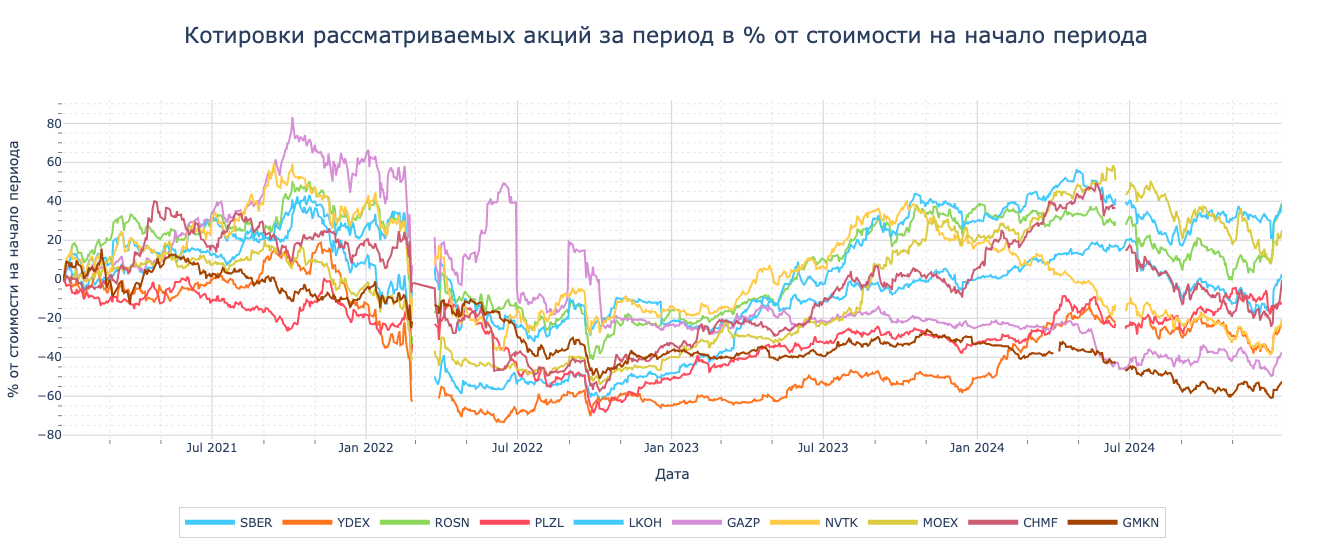

In [47]:
df = data.copy()
df = (df / df.iloc[0] - 1) * 100

cols_to_show = ['1W', '1M', '1Y', '5Y', '10Y', '30Y']
plot_ts_plotly(
    df.reset_index(),
    x='Дата',
    y=df.columns,
    title='Котировки рассматриваемых акций за период в % от стоимости на начало периода',
    xaxis_title='Дата',
    yaxis_title='% от стоимости на начало периода'
    
)

# fig, ax = plt.subplots(figsize=(25, 10), dpi=150)
# df.plot(ax=ax)
# make_ax_better(ax, locators=['y'])
# ax.legend(ncols=2)
# ax.set_title('Котировки рассматриваемых акций за период в % от стоимости на начало периода', fontsize=25)
# ax.set_ylabel('% от стоимости на начало периода', fontsize=16)
# ax.set_xlabel('Дата', fontsize=16)
# plt.show()

## Ставки

In [20]:
rates = pd.read_excel(path_data + 'rates.xlsx')
rates['Дата'] = pd.to_datetime(rates['Дата'], format='%d.%m.%Y')
rates = rates.rename(columns={
    col: col.split()[-1] for col in rates.columns[1:]
})
rates.head()

,Дата,10Y,15Y,20Y,25Y,30Y,1Y,2Y,3Y,5Y,7Y,4Y,8Y,9Y,1W,2W,1M,2M,3M,4M,9M,6M
0,2021-01-04,6.248068,6.649932,6.867330,6.997033,7.083582,4.196898,4.501402,4.868251,5.439221,5.835445,5.186175,5.993584,6.129983,3.973676,3.979379,3.991916,4.013618,4.034011,4.051229,4.137934,4.086014
1,2021-01-05,6.220076,6.620892,6.837684,6.971854,7.062003,4.179360,4.481711,4.815755,5.379664,5.795477,5.119522,5.959428,6.099657,3.910029,3.915685,3.928494,3.952058,3.976010,3.997602,4.110747,4.043661
2,2021-01-06,6.235648,6.615690,6.821296,6.946703,7.030289,4.114937,4.421955,4.788124,5.399866,5.826101,5.121295,5.986910,6.121526,3.770593,3.776577,3.790787,3.819220,3.850797,3.880961,4.036973,3.947153
3,2021-01-08,6.244968,6.586623,6.757676,6.853725,6.916843,4.083696,4.457933,4.844132,5.448018,5.853956,5.177191,6.008055,6.136967,3.700108,3.705739,3.719356,3.747460,3.779731,3.811413,3.987416,3.883548
4,2021-01-11,6.336674,6.701267,6.888683,6.999189,7.072644,4.264509,4.555136,4.920584,5.515900,5.928717,5.248345,6.088423,6.223029,4.151116,4.152652,4.156060,4.162087,4.168043,4.173559,4.218361,4.187529


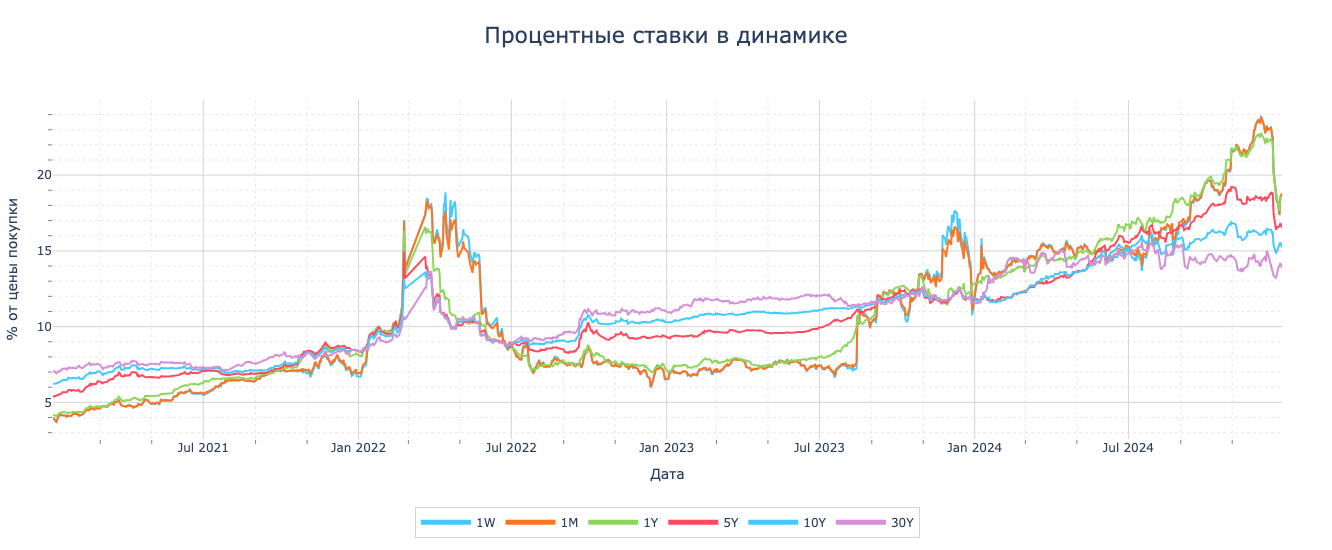

In [41]:
cols_to_show = ['1W', '1M', '1Y', '5Y', '10Y', '30Y']
plot_ts_plotly(
    rates,
    x='Дата',
    y=cols_to_show,
    title='Процентные ставки в динамике'
)

## Котировки облигаций

In [57]:
coupons = []
bonds = []

bonds_path = path_data + '/bonds/'
for filename in os.listdir(bonds_path):
    if not filename.startswith('~') and filename != '.DS_Store':
        series, isin, file_type = filename.split('_')
        file_type = file_type.split('.')[0]
        if file_type == 'coupons':
            file = pd.read_excel(bonds_path + filename, skiprows=2)
            file['ISIN'] = isin
            coupons.append(file)
        elif file_type == 'price':
            file = pd.read_excel(bonds_path + filename, skiprows=1)
            bonds.append(file)
        else:
            raise ValueError('Unknow file type')
bonds = pd.concat(bonds)
coupons = pd.concat(coupons)
display(bonds.head())
display(coupons.head())

,Дата,Биржа,Bid,Ask,Indicative,YTM Bid,YTM Ask,YTM Indicative,Оборот,G-spread,ISIN,Рег. номер
0,2025-05-20 13:42:45,Московская биржа Т+,64.690,64.697,64.703,15.8568,15.8541,15.8519,41485517.00,-12.890707,RU000A1028E3,26235RMFS
1,2024-12-30 00:00:00,Московская биржа Т+,63.013,63.119,62.865,15.9424,15.9034,15.9970,3919643.55,-59.173832,RU000A1028E3,26235RMFS
2,2024-12-28 00:00:00,Московская биржа Т+,62.953,63.060,62.971,15.9570,15.9176,15.9504,6701952.44,-92.618243,RU000A1028E3,26235RMFS
3,2024-12-27 00:00:00,Московская биржа Т+,62.440,62.505,62.445,16.1438,16.1196,16.1419,6454900.96,-55.015087,RU000A1028E3,26235RMFS
4,2024-12-26 00:00:00,Московская биржа Т+,62.479,62.500,62.122,16.1254,16.1176,16.2589,30593060.19,-36.020267,RU000A1028E3,26235RMFS


,№,Окончание купона,Фактическая выплата,Фиксация списка держателей,"Купон, %",Сумма купона RUB,Погашение RUB,ISIN
0,1,2021-03-24,2021-03-24,2021-03-23,5.9,26.02,NaN,RU000A1028E3
1,2,2021-09-22,2021-09-22,2021-09-21,5.9,29.42,NaN,RU000A1028E3
2,3,2022-03-23,2022-03-23,2022-03-22,5.9,29.42,NaN,RU000A1028E3
3,4,2022-09-21,2022-09-21,2022-09-20,5.9,29.42,NaN,RU000A1028E3
4,5,2023-03-22,2023-03-22,2023-03-21,5.9,29.42,NaN,RU000A1028E3
